## Demo code to train a YOLO v8 model on your system!

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3

In [2]:
import os
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
data_yaml_content = """
train: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train
val: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/val

nc: 1

names:
  0: traffic signs
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml_content.strip())


In [4]:
# ✅ Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# ✅ Paths
BASE_DIR = r"/kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data" # <-- your dataset dir
DATA_YAML_PATH = os.path.join(BASE_DIR, "/kaggle/working/data.yaml")
# PRETRAINED_MODEL_PATH = os.path.join(BASE_DIR, "yolov8_traffic_signs.pt")  # Last model's weight

# ✅ Load YOLOv8 Medium model & Resume from Previous Weights
model = YOLO("yolov8m.pt")  # ✅ Now using YOLOv8 Medium
# model.load(PRETRAINED_MODEL_PATH)  # ✅ Loading last model's weight

# ✅ Initial Training for 100 epochs
model.train(
    data=DATA_YAML_PATH, 
    epochs=20, 
    imgsz=640, 
    batch=16, 
    device=device, 
    workers=4,
    project="runs/traffic_sign_detection",  
    name="yolo_v8m_traffic_signs",  
    exist_ok=True  
)

# uncomment the following line if you want you fine tune your model on
# the complete dataset (train + validation)

# # ✅ Fine-tuning for 20 more epochs (Training on full dataset)
# model.train(
#     data=DATA_YAML_PATH, 
#     epochs=20,  
#     imgsz=640, 
#     batch=16, 
#     device=device, 
#     workers=4,
#     project="runs/traffic_sign_detection",  
#     name="yolo_v8m_traffic_signs_finetune",  
#     resume=True  
# )

# ✅ Save the final model
trained_model_path = os.path.join(BASE_DIR, "yolov8_traffic_signs_final.pt")
model.export(format="torchscript")  
print(f"✅ Training complete! Model saved at {trained_model_path}")

Using device: cuda


100%|██████████| 49.7M/49.7M [00:00<00:00, 244MB/s]


Ultralytics 8.3.153 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_v8m_traffic_signs, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.2±0.3 ms, read: 23.2±10.8 MB/s, size: 341.6 KB)


train: Scanning /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/labels/train... 7643 images, 0 backgrounds, 2400 corrupt: 100%|██████████| 7643/7643 [00:50<00:00, 151.37it/s]

train: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00000_1.jpg: ignoring corrupt image/label: Label class 11 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00000_2.jpg: ignoring corrupt image/label: Label class 11 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00000_3.jpg: ignoring corrupt image/label: Label class 11 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00000_4.jpg: ignoring corrupt image/label: Label class 11 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00001.jpg: ignoring corrupt image/label: Label class 40 exc

WARNING ⚠️ train: Cache directory /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.2±0.5 ms, read: 36.4±21.2 MB/s, size: 500.6 KB)


val: Scanning /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/labels/val... 1891 images, 0 backgrounds, 618 corrupt: 100%|██████████| 1891/1891 [00:15<00:00, 123.74it/s]

val: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/val/00000.jpg: ignoring corrupt image/label: Label class 11 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/val/00000_0.jpg: ignoring corrupt image/label: Label class 11 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/val/00001_2.jpg: ignoring corrupt image/label: Label class 40 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/val/00002.jpg: ignoring corrupt image/label: Label class 39 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/val/00002_0.jpg: ignoring corrupt image/label: Label class 39 exceeds dataset class cou

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/labels is not writeable, cache not saved.
Plotting labels to runs/traffic_sign_detection/yolo_v8m_traffic_signs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/traffic_sign_detection/yolo_v8m_traffic_signs
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.09G      1.253      1.082     0.8663         53        640: 100%|██████████| 328/328 [03:11<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:27<00:00,  1.47it/s]

                   all       1273       3234      0.827      0.747      0.833      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.93G      1.265     0.7589     0.8671         43        640: 100%|██████████| 328/328 [03:10<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.62it/s]

                   all       1273       3234      0.858      0.738      0.834      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.99G      1.245     0.7335     0.8673         71        640: 100%|██████████| 328/328 [03:09<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.77it/s]

                   all       1273       3234      0.844      0.751      0.836      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.06G       1.19     0.6753     0.8561         60        640: 100%|██████████| 328/328 [03:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.80it/s]

                   all       1273       3234      0.862      0.747      0.849      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      7.06G      1.129     0.6431     0.8491         59        640: 100%|██████████| 328/328 [03:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:23<00:00,  1.70it/s]

                   all       1273       3234      0.885      0.785      0.884      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      7.06G       1.11     0.6179     0.8404         41        640: 100%|██████████| 328/328 [03:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.63it/s]

                   all       1273       3234       0.88      0.822      0.894      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      7.06G      1.083     0.5909     0.8345         57        640: 100%|██████████| 328/328 [03:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:23<00:00,  1.73it/s]

                   all       1273       3234        0.9      0.826       0.91      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.06G      1.061       0.57     0.8316         55        640: 100%|██████████| 328/328 [03:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.75it/s]

                   all       1273       3234      0.891      0.823      0.913      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.06G       1.03     0.5477     0.8315         45        640: 100%|██████████| 328/328 [03:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.76it/s]

                   all       1273       3234      0.895      0.841      0.921      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.06G      1.008     0.5288     0.8259         38        640: 100%|██████████| 328/328 [03:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:21<00:00,  1.87it/s]

                   all       1273       3234      0.903      0.834      0.924       0.62


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.06G       1.02     0.5473       0.83         32        640: 100%|██████████| 328/328 [03:09<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:21<00:00,  1.83it/s]

                   all       1273       3234      0.886      0.818      0.905      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.06G      1.017     0.5363     0.8298         33        640: 100%|██████████| 328/328 [03:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.77it/s]

                   all       1273       3234      0.898       0.84      0.923      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.06G     0.9708     0.5093     0.8259         32        640: 100%|██████████| 328/328 [03:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.77it/s]

                   all       1273       3234      0.906      0.861      0.935       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.06G     0.9573     0.4891     0.8235         24        640: 100%|██████████| 328/328 [03:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:23<00:00,  1.70it/s]

                   all       1273       3234      0.923      0.841      0.934      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.06G     0.9353     0.4679     0.8184         31        640: 100%|██████████| 328/328 [03:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:23<00:00,  1.68it/s]

                   all       1273       3234      0.918      0.875      0.945      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.06G     0.9063     0.4522     0.8183         20        640: 100%|██████████| 328/328 [03:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:20<00:00,  1.92it/s]

                   all       1273       3234      0.929      0.876      0.947      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.13G      0.873     0.4339     0.8093         25        640: 100%|██████████| 328/328 [03:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]

                   all       1273       3234      0.922      0.884      0.951      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      7.19G     0.8648     0.4228      0.809         18        640: 100%|██████████| 328/328 [03:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.77it/s]

                   all       1273       3234      0.931      0.886      0.951      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.26G     0.8387     0.4116     0.8072         25        640: 100%|██████████| 328/328 [03:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:21<00:00,  1.83it/s]

                   all       1273       3234      0.943      0.881      0.958      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.26G     0.8012     0.3883     0.8041         25        640: 100%|██████████| 328/328 [03:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.80it/s]

                   all       1273       3234      0.933      0.897      0.957      0.705



20 epochs completed in 1.177 hours.
Optimizer stripped from runs/traffic_sign_detection/yolo_v8m_traffic_signs/weights/last.pt, 52.0MB
Optimizer stripped from runs/traffic_sign_detection/yolo_v8m_traffic_signs/weights/best.pt, 52.0MB

Validating runs/traffic_sign_detection/yolo_v8m_traffic_signs/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:24<00:00,  1.66it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1273       3234      0.934      0.897      0.957      0.705
Speed: 0.1ms preprocess, 6.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/traffic_sign_detection/yolo_v8m_traffic_signs
Ultralytics 8.3.153 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from 'runs/traffic_sign_detection/yolo_v8m_traffic_signs/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (49.6 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 5.3s, saved as 'runs/traffic_sign_detection/yolo_v8m_traffic_signs/weights/best.torchscript' (99.1 MB)

Export complete (7.5s)
Results saved to /kaggle/working/runs/traffic_sign_detection/yolo_v8m_tra


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00948_2.jpg: 384x640 6 traffic signss, 45.6ms
Speed: 2.4ms preprocess, 45.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


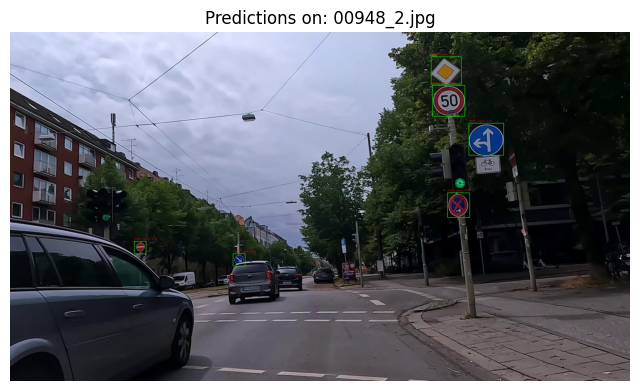


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00484_2.jpg: 384x640 2 traffic signss, 25.2ms
Speed: 2.1ms preprocess, 25.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


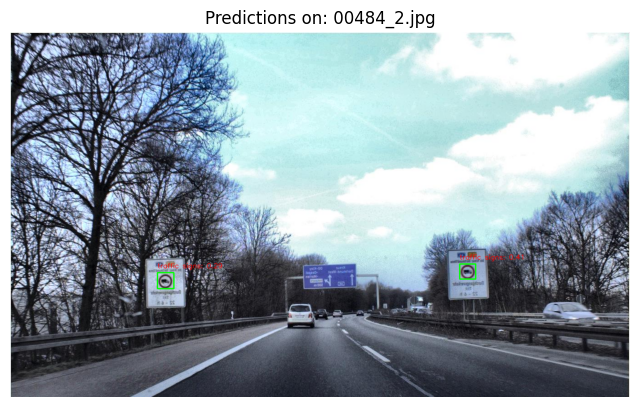


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00637_3.jpg: 384x640 4 traffic signss, 25.2ms
Speed: 2.4ms preprocess, 25.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


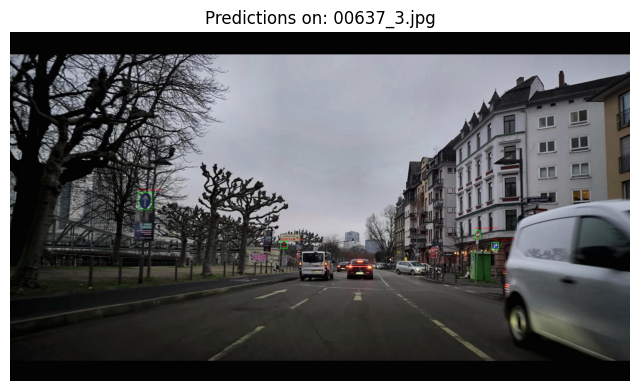


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00767.jpg: 384x640 2 traffic signss, 25.2ms
Speed: 2.4ms preprocess, 25.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


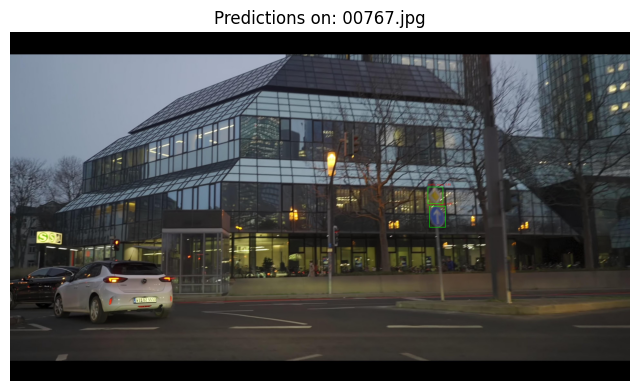


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00814_2.jpg: 384x640 3 traffic signss, 25.2ms
Speed: 2.9ms preprocess, 25.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


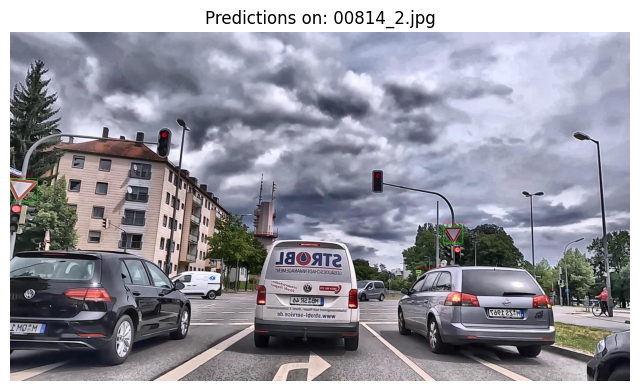


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/01574_3.jpg: 320x640 1 traffic signs, 43.8ms
Speed: 2.0ms preprocess, 43.8ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)


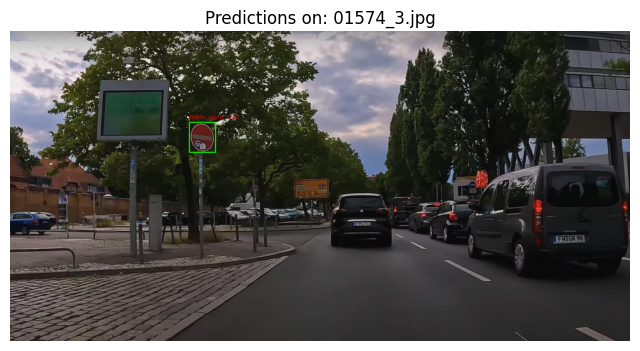


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00305_0.jpg: 384x640 2 traffic signss, 25.9ms
Speed: 2.0ms preprocess, 25.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


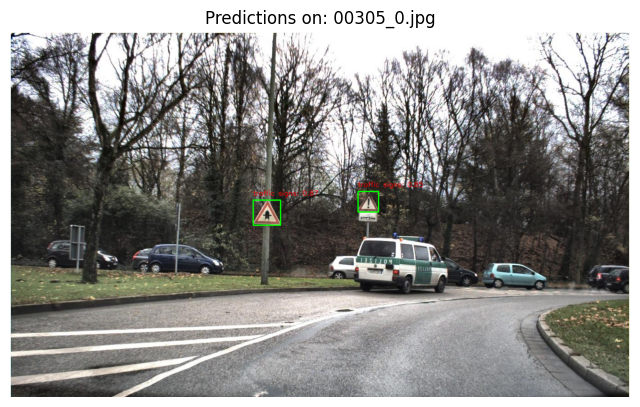


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00266.jpg: 384x640 1 traffic signs, 25.2ms
Speed: 3.2ms preprocess, 25.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


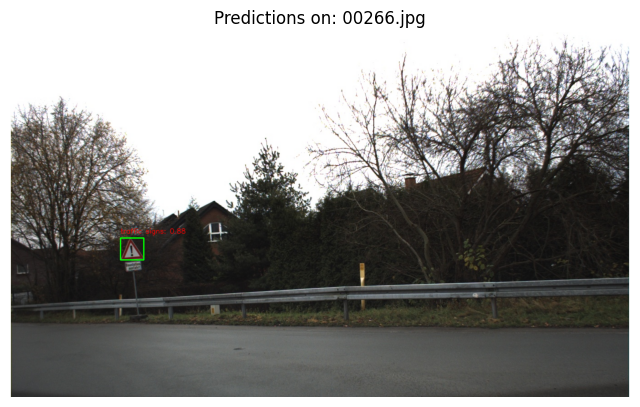


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/01424_0.jpg: 320x640 1 traffic signs, 23.5ms
Speed: 2.3ms preprocess, 23.5ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)


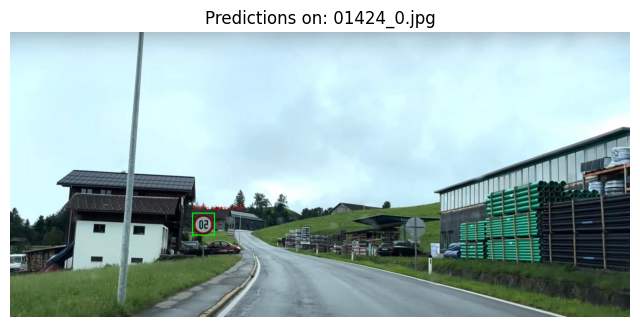


image 1/1 /kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train/00052_2.jpg: 384x640 2 traffic signss, 26.3ms
Speed: 2.3ms preprocess, 26.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


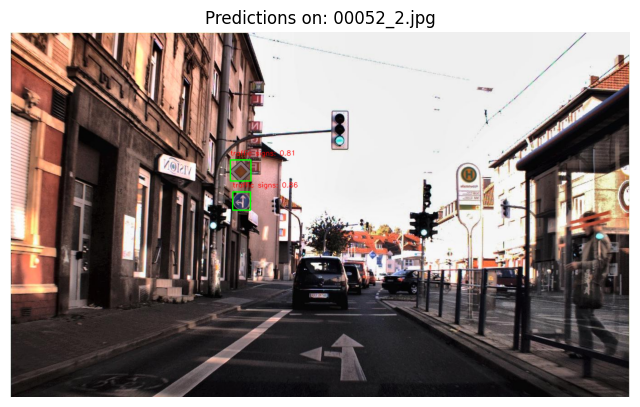

In [5]:
import os
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# ✅ Load the trained YOLOv8 model
MODEL_PATH = "/kaggle/working/runs/traffic_sign_detection/yolo_v8m_traffic_signs/weights/best.pt"
model = YOLO(MODEL_PATH)

# ✅ Path to test images
TEST_DIR = "/kaggle/input/traffic-sign-detection-dataset/Traffic_sign_detection_data/images/train"

# ✅ Get all test image file paths
image_files = [os.path.join(TEST_DIR, f) for f in os.listdir(TEST_DIR) if f.endswith((".jpg", ".png", ".jpeg"))]

# ✅ Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# ✅ Run inference and visualize
for image_path in image_files[:10]:  # Limit to 10 images to keep it lightweight
    # Run prediction
    results = model.predict(source=image_path, save=False, device=device, imgsz=640)

    # Load the original image (for visualization)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw bounding boxes
    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()   # [x1, y1, x2, y2]
        scores = r.boxes.conf.cpu().numpy()  # confidence
        class_ids = r.boxes.cls.cpu().numpy().astype(int)  # class ids
        names = r.names

        for box, score, cls in zip(boxes, scores, class_ids):
            x1, y1, x2, y2 = map(int, box)
            label = f"{names[cls]}: {score:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, (255, 0, 0), 1, cv2.LINE_AA)

    # Display the image with predictions
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Predictions on: {os.path.basename(image_path)}")
    plt.axis("off")
    plt.show()


In [6]:
from IPython.display import FileLink

FileLink("runs/traffic_sign_detection/yolo_v8m_traffic_signs/weights/best.pt")

/kaggle/working/runs/traffic_sign_detection/yolo_v8m_traffic_signs/weights/best.pt